# 에어비앤비 크롤링

In [ ]:
from selenium import webdriver
from bs4 import BeautifulSoup
driver=webdriver.Chrome('./chromedriver')
driver.implicitly_wait(3)
totalinfo=[]


def crawlin(area):
    url1='https://www.airbnb.co.kr/s/'+area
    url2=url1+'/homes?&checkin=2019-12-12&checkout=2019-12-13'
    
    for pagenum in range(0,18):
        print(pagenum,"-------------------------------")
        url3=url2+'&items_offset='+str(pagenum*18)
        cont=driver.get(url3)
        html=driver.page_sourceㅠㅠ
        soup=BeautifulSoup(html,'html.parser')
        notices=soup.select('div._13jesg13')
        temp=(notices)
        
        #superhost,집 형태
        bnbtemp2=temp.copy()
        bnbsplited=str(bnbtemp2).split("요금 내역과 숙소 요금 도움말")
        infolist=[]
        for i in range(len(bnbsplited)):
            infolist1=[]
            review=""
            review_num=0
            stemp=str(bnbsplited[i]).split("_krjbj")
            for j in range(len(stemp)-1):
                if(stemp[1].find("평점")!=-1):
                    review = stemp[1].split("평점")[1].split("./span")[0].split("/")[0]
                    review_num = str(stemp[2]).split("후기")[1].split("span")[0].split("개<")[0]
                else :
                    review = '0'
                    review_nm= '0'
                if j==0:
                    s0=stemp[0].split("_1a31dx8f\">")
                    #infolist1.append(i)
                    if len(s0)==1:
                        infolist1.append('0')
                        if(len(s0[0].split("_1q6rrz5\">"))>1):
                            s0=s0[0].split("_1q6rrz5\">")[1]
                        else:
                            break
                    else: #슈퍼호스트의 경우
                        infolist1.append('1')
                        s0=s0[1].split("_1j3840rv\">")[1]

                    s0=str(s0).split("</div>")[0]
                    #print(s0)
                    if s0=="아파트 전체" or s0=="집 전체" or s0=="통나무집 전체"  or s0=="층 전체 사용" or s0=="게스트용 별채 전체" or s0=="타운하우스 전체":
                        s0='5'
                    elif s0=="호텔 객실" :
                        s0='4'
                    elif s0=="로프트 전체" or s0=="콘도(아파트) 전체" or s0=="팬션" or s0=="펜션":
                        s0='3'
                    elif s0=="개인실" or s0=="호스텔 객실" or s0=="초소형 주택" or s0=='부티크 호텔의 객실' or s0=='아파트 객실':
                        s0='2'
                    elif s0=="다인실" or s0=="호스텔 침대":
                        s0='1'
                    infolist1.append(s0)
                    infolist1.append(review)
                    infolist1.append(review_num)
                    infolist.append(infolist1)
            
                      
        #집 설비          
        bnbtemp2=temp.copy()
        bnbsplited=str(bnbtemp2).split("요금 내역과 숙소 요금 도움말")
        breakcheck=[] #규격에 맞지 않는 집 번호(한 페이지에서의 순서 0~17) 저장하는 배열
        one_room =0 #원룸이고 침실이 안나오는 경우
        for i in range(len(bnbsplited)-1):
            things=bnbsplited[i].split("인원")
            if len(things)<=1:
                print(i,"삭제됨    ..")
                breakcheck.append(i)
                continue
            else:
                things=things[1]
            things=things.split("<!-- --> · <!-- -->")
           
            infolist[i].append(str(things[0]).split('명')[0]) #인원,+a
            
            if len(things)<=1:
                breakcheck.append(i)
                print(i,"삭제됨    ..")
                continue
                
            
            #things[1] append
            temp=1 
            if things[1]!="원룸":
                one_room ==0 
                temp=str(things[1]).split("침실 ")[1]
                temp=str(temp).split("개")[0]
            else :
                one_room ==1 
                temp = '0'
            infolist[i].append(temp)
            
            #things[2] append
            if(things[2].find("침대 ")==-1):
                temp=0
            else : 
                temp=str(things[2]).split("침대 ")[1]
                temp=str(temp).split("개")[0]
            infolist[i].append(temp)
            
            #things[3] append
            temp=str(things[3]).split("욕실")
            if temp[0]=="공동 사용 " or temp[0]=="공용 간이 " :
                temp=0
            else:
                if len(temp)==1:
                    temp=things[3]
                    print(temp,"예외경우")
                else:
                    temp=str(temp[1]).split("개")[0]
            infolist[i].append(temp)
        
      
        
        #요금
        breakpoint=-1
        bnbsplited=str(bnbtemp2).split("요금 내역과 숙소 요금 도움말")
        
        if len(breakcheck)!=0:
            breakpoint=breakcheck.pop()
            print(breakpoint)
        for i in range(len(bnbsplited)-1):
            if i==breakpoint:
                if len(breakcheck)>0:
                    breakpoint=breakcheck.pop()
                else:
                    breakpoint=-1
                continue
            price=bnbsplited[i].split('총 요금: ₩')[1]
            price=price.split("<span")[0]
            infolist[i].append(price)
            totalinfo.append(infolist[i])
            print(infolist[i])
        print("-----------------------------------")
        
         

crawlin('Seoul-Gangnam~gu')

# DB 생성 

In [ ]:
import sqlite3
con = sqlite3.connect('./seoul_airbnb.db')
cur = con.cursor()
cur.execute("CREATE TABLE Gangnamgu(host, room_type, review, review_num, people, bedroom_num, bed_num, bathroom_num, price);")
cur.execute("CREATE TABLE Dobonggu(host, room_type, review, review_num, people, bedroom_num, bed_num, bathroom_num, price);")
cur.execute("CREATE TABLE Gangbukgu(host, room_type, review, review_num, people, bedroom_num, bed_num, bathroom_num, price);")
cur.execute("CREATE TABLE Nowongu(host, room_type, review, review_num, people, bedroom_num, bed_num, bathroom_num, price);")
cur.execute("CREATE TABLE Seongbukgu(host, room_type, review, review_num, people, bedroom_num, bed_num, bathroom_num, price);")
cur.execute("CREATE TABLE Jungnanggu(host, room_type, review, review_num, people, bedroom_num, bed_num, bathroom_num, price);")
cur.execute("CREATE TABLE Dongdaemungu(host, room_type, review, review_num, people, bedroom_num, bed_num, bathroom_num, price);")
cur.execute("CREATE TABLE Seongdonggu(host, room_type, review, review_num, people, bedroom_num, bed_num, bathroom_num, price);")
cur.execute("CREATE TABLE Gwangjingu(host, room_type, review, review_num, people, bedroom_num, bed_num, bathroom_num, price);")
cur.execute("CREATE TABLE Junggu(host, room_type, review, review_num, people, bedroom_num, bed_num, bathroom_num, price);")
cur.execute("CREATE TABLE Yongsangu(host, room_type, review, review_num, people, bedroom_num, bed_num, bathroom_num, price);")
cur.execute("CREATE TABLE Jongnogu(host, room_type, review, review_num, people, bedroom_num, bed_num, bathroom_num, price);")
cur.execute("CREATE TABLE Seodaemungu(host, room_type, review, review_num, people, bedroom_num, bed_num, bathroom_num, price);")
cur.execute("CREATE TABLE Mapogu(host, room_type, review, review_num, people, bedroom_num, bed_num, bathroom_num, price);")
cur.execute("CREATE TABLE Eunpyeonggu(host, room_type, review, review_num, people, bedroom_num, bed_num, bathroom_num, price);")
cur.execute("CREATE TABLE Gangdonggu(host, room_type, review, review_num, people, bedroom_num, bed_num, bathroom_num, price);")
cur.execute("CREATE TABLE Gangnamgu(host, room_type, review, review_num, people, bedroom_num, bed_num, bathroom_num, price);")
cur.execute("CREATE TABLE Songpagu(host, room_type, review, review_num, people, bedroom_num, bed_num, bathroom_num, price);")
cur.execute("CREATE TABLE Seochogu(host, room_type, review, review_num, people, bedroom_num, bed_num, bathroom_num, price);")
cur.execute("CREATE TABLE Dongjakgu(host, room_type, review, review_num, people, bedroom_num, bed_num, bathroom_num, price);")
cur.execute("CREATE TABLE Gwanakgu(host, room_type, review, review_num, people, bedroom_num, bed_num, bathroom_num, price);")
cur.execute("CREATE TABLE Geumcheongu(host, room_type, review, review_num, people, bedroom_num, bed_num, bathroom_num, price);")
cur.execute("CREATE TABLE Yeongdeungpogu(host, room_type, review, review_num, people, bedroom_num, bed_num, bathroom_num, price);")
cur.execute("CREATE TABLE Yangcheongu(host, room_type, review, review_num, people, bedroom_num, bed_num, bathroom_num, price);")
cur.execute("CREATE TABLE Gurogu(host, room_type, review, review_num, people, bedroom_num, bed_num, bathroom_num, price);")
cur.execute("CREATE TABLE Gangseogu(host, room_type, review, review_num, people, bedroom_num, bed_num, bathroom_num, price);")
con.commit()

# 모든 구에 대하여 insert

In [ ]:
import pandas as pd
table = pd.DataFrame(totalinfo)
for i in table.transpose():
    cur.execute("insert into Gangnamgu(host, room_type, review, review_num, people, bedroom_num, bed_num, bathroom_num, price) values(?,?,?,?,?,?,?,?,?)",table.iloc[i])
con.commit()

# DB 모든 구 select

In [3]:
import sqlite3
import pandas as pd

con=sqlite3.connect('/Users/jaewon/Desktop/seoul_airbnb.db')
cur=con.cursor()
query=cur.execute("SELECT * From Dobonggu")
cols=[column[0] for column in query.description]
g1=pd.DataFrame.from_records(data=query.fetchall(), columns=cols)
query=cur.execute("SELECT * From Dongdaemungu")
cols=[column[0] for column in query.description]
g2=pd.DataFrame.from_records(data=query.fetchall(), columns=cols)
query=cur.execute("SELECT * From Dongjakgu")
cols=[column[0] for column in query.description]
g3=pd.DataFrame.from_records(data=query.fetchall(), columns=cols)
query=cur.execute("SELECT * From Eunpyeonggu")
cols=[column[0] for column in query.description]
g4=pd.DataFrame.from_records(data=query.fetchall(), columns=cols)
query=cur.execute("SELECT * From Gangbukgu")
cols=[column[0] for column in query.description]
g5=pd.DataFrame.from_records(data=query.fetchall(), columns=cols)
query=cur.execute("SELECT * From Gangdonggu")
cols=[column[0] for column in query.description]
g6=pd.DataFrame.from_records(data=query.fetchall(), columns=cols)
query=cur.execute("SELECT * From Gangnamgu")
cols=[column[0] for column in query.description]
g7=pd.DataFrame.from_records(data=query.fetchall(), columns=cols)
query=cur.execute("SELECT * From Gangseogu")
cols=[column[0] for column in query.description]
g8=pd.DataFrame.from_records(data=query.fetchall(), columns=cols)
query=cur.execute("SELECT * From Geumcheongu")
cols=[column[0] for column in query.description]
g9=pd.DataFrame.from_records(data=query.fetchall(), columns=cols)
query=cur.execute("SELECT * From Gurogu")
cols=[column[0] for column in query.description]
g10=pd.DataFrame.from_records(data=query.fetchall(), columns=cols)
query=cur.execute("SELECT * From Gwanakgu")
cols=[column[0] for column in query.description]
g11=pd.DataFrame.from_records(data=query.fetchall(), columns=cols)
query=cur.execute("SELECT * From Gwangjingu")
cols=[column[0] for column in query.description]
g12=pd.DataFrame.from_records(data=query.fetchall(), columns=cols)
query=cur.execute("SELECT * From Jongnogu")
cols=[column[0] for column in query.description]
g13=pd.DataFrame.from_records(data=query.fetchall(), columns=cols)
query=cur.execute("SELECT * From Junggu")
cols=[column[0] for column in query.description]
g14=pd.DataFrame.from_records(data=query.fetchall(), columns=cols)
query=cur.execute("SELECT * From Jungnanggu")
cols=[column[0] for column in query.description]
g15=pd.DataFrame.from_records(data=query.fetchall(), columns=cols)
query=cur.execute("SELECT * From Mapogu")
cols=[column[0] for column in query.description]
g16=pd.DataFrame.from_records(data=query.fetchall(), columns=cols)
query=cur.execute("SELECT * From Nowongu")
cols=[column[0] for column in query.description]
g17=pd.DataFrame.from_records(data=query.fetchall(), columns=cols)
query=cur.execute("SELECT * From Seochogu")
cols=[column[0] for column in query.description]
g18=pd.DataFrame.from_records(data=query.fetchall(), columns=cols)
query=cur.execute("SELECT * From Seodaemungu")
cols=[column[0] for column in query.description]
g19=pd.DataFrame.from_records(data=query.fetchall(), columns=cols)
query=cur.execute("SELECT * From Seongbukgu")
cols=[column[0] for column in query.description]
g20=pd.DataFrame.from_records(data=query.fetchall(), columns=cols)
query=cur.execute("SELECT * From Seongdonggu")
cols=[column[0] for column in query.description]
g21=pd.DataFrame.from_records(data=query.fetchall(), columns=cols)
query=cur.execute("SELECT * From Songpagu")
cols=[column[0] for column in query.description]
g22=pd.DataFrame.from_records(data=query.fetchall(), columns=cols)
query=cur.execute("SELECT * From Yangcheongu")
cols=[column[0] for column in query.description]
g23=pd.DataFrame.from_records(data=query.fetchall(), columns=cols)
query=cur.execute("SELECT * From Yeongdeungpogu")
cols=[column[0] for column in query.description]
g24=pd.DataFrame.from_records(data=query.fetchall(), columns=cols)
query=cur.execute("SELECT * From Yongsangu")
cols=[column[0] for column in query.description]
g25=pd.DataFrame.from_records(data=query.fetchall(), columns=cols)

# room_type 변수를 5개의 변수로 변환

In [4]:
import numpy as np
def change_roomtype(gu):
    d = pd.DataFrame(np.zeros((gu.shape[0],5)))
    d.columns=['house','hotel','villa','private','dormitory']
    gu = pd.concat([gu,d],axis=1)
    for i in gu.transpose():
        if(gu['room_type'][i]=='5'):
            gu['house'][i]=1
        elif(gu['room_type'][i]=='4'):
            gu['hotel'][i]=1
        elif(gu['room_type'][i]=='3'):
            gu['villa'][i]=1
        elif(gu['room_type'][i]=='2'):
            gu['private'][i]=1
        else:
            gu['dormitory'][i]=1
    g = gu.copy()
    gu.drop(['room_type','price'],axis=1,inplace=True)
    gu = pd.concat([gu,g['price']],axis=1)
    return gu

# 리뷰 null 값 평균값으로 대치 & price log 변환

In [5]:
import math
def standardize(gu):
    average_review = 0
    with_review = 0
    labels=gu.columns.values[:12]
    for i in gu.transpose():
        if(gu['review_num'][i]!=0):
            with_review+=1
            average_review+=float(gu['review'][i])
    average_review=(average_review/with_review)
    average_review=round(average_review,2)
    for i in gu.transpose():
        if(gu['review_num'][i]==0):
            gu['review'][i]=str(average_review)
    for i in labels:
        gu[i]=pd.to_numeric(gu[i])
    y=[]
    for i in gu.price:
        temp1=i.split(',')
        temp2=str(temp1[0])+str(temp1[1])
        y.append(math.log10(int(temp2)))
    y = pd.DataFrame(y)
    gu.drop(['price'],axis=1,inplace=True)
    y.columns=['price']
    gu = pd.concat([gu,y],axis=1)
    return gu

# regression

In [6]:
import statsmodels.api as sm
def regression(gu):
    y = gu.price
    model = sm.OLS.from_formula('y ~  host+review+review_num+people+bedroom_num+bed_num+bathroom_num+house+hotel+private+villa+dormitory', gu)
    a = model.fit()
    print(a.params)
    return a.params

In [7]:
g1 = change_roomtype(g1)
g1 =standardize(g1)
c1 = regression(g1)
g2 = change_roomtype(g2)
g2 =standardize(g2)
c2 = regression(g2)
g3 = change_roomtype(g3)
g3 =standardize(g3)
c3 = regression(g3)
g4 = change_roomtype(g4)
g4 =standardize(g4)
c4 = regression(g4)
g5 = change_roomtype(g5)
g5 =standardize(g5)
c5 = regression(g5)
g6 = change_roomtype(g6)
g6 =standardize(g6)
c6 = regression(g6)
g7 = change_roomtype(g7)
g7 =standardize(g7)
c7 = regression(g7)
g8 = change_roomtype(g8)
g8 =standardize(g8)
c8 = regression(g8)
g9 = change_roomtype(g9)
g9 =standardize(g9)
c9 = regression(g9)
g10 = change_roomtype(g10)
g10 =standardize(g10)
c10 = regression(g10)
g11 = change_roomtype(g11)
g11 =standardize(g11)
c11 = regression(g11)
g12 = change_roomtype(g12)
g12 =standardize(g12)
c12 = regression(g12)
g13 = change_roomtype(g13)
g13 =standardize(g13)
c13 = regression(g13)
g14 = change_roomtype(g14)
g14 =standardize(g14)
c14 = regression(g14)

C:\Users\jaewon\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\jaewon\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\jaewon\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\jaewon\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be 

Intercept       4.274291e+00
host            1.884310e-01
review         -1.144766e-01
review_num     -6.340276e-04
people         -1.600856e-01
bedroom_num     2.275182e-01
bed_num         1.643731e-01
bathroom_num   -9.571110e-02
house           1.349276e+00
hotel           1.310255e-16
private         8.713727e-01
villa           1.049587e+00
dormitory       1.004055e+00
dtype: float64
Intercept       2.634491e+00
host           -8.332188e-02
review          7.229396e-02
review_num      1.602787e-03
people          3.442950e-02
bedroom_num     1.899096e-01
bed_num        -2.918275e-02
bathroom_num    8.208031e-02
house          -8.596821e-17
hotel           0.000000e+00
private         0.000000e+00
villa           1.186113e+00
dormitory       1.448378e+00
dtype: float64


C:\Users\jaewon\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


Intercept       2.487360
host            0.083237
review          0.355214
review_num     -0.003948
people          0.050646
bedroom_num     0.041185
bed_num        -0.034502
bathroom_num    0.010615
house           0.676602
hotel           0.586441
private         0.342959
villa           0.634602
dormitory       0.246757
dtype: float64
Intercept       3.595289
host           -0.049579
review          0.099021
review_num      0.000674
people          0.078778
bedroom_num     0.081056
bed_num        -0.106462
bathroom_num   -0.048422
house           0.796021
hotel           1.021016
private         0.652185
villa           0.472757
dormitory       0.653310
dtype: float64
Intercept       2.627076e+00
host            7.780513e-02
review          3.001672e-01
review_num     -8.990681e-03
people          1.065414e-01
bedroom_num     4.365281e-02
bed_num        -7.780628e-02
bathroom_num    2.077938e-03
house           6.671133e-01
hotel           6.499459e-17
private         6.094814e-01
v

In [8]:
abc=[host,review,review_num,people,침실, 침대, 욕실, house,hotel, private, villa, dormitory]

NameError: name 'host' is not defined

# 예측값과 실제값 비교 plot

In [14]:
import matplotlib.pyplot as plt
results=[]
def pred(x,coef,c):
    for i in range(len(x)):
        a=x.loc[i]*coef
        added=0
        for j in a:
            added+=j
        added+=c
        results.append(added)
pred(gu.iloc[:,:12],coef,c)
plt.scatter(gu['price'],results,color='blue')
plt.xlabel("real price")
plt.ylabel("predicted price")
plt.title("Gangnamgu")
plt.legend(["y=x"])
plotline=np.arange(4,6.1)
plt.plot(plotline,plotline)
plt.plot()

NameError: name 'gu' is not defined

# 각 요소가 가격에 영향을 주는 정도

NameError: name 'coef' is not defined

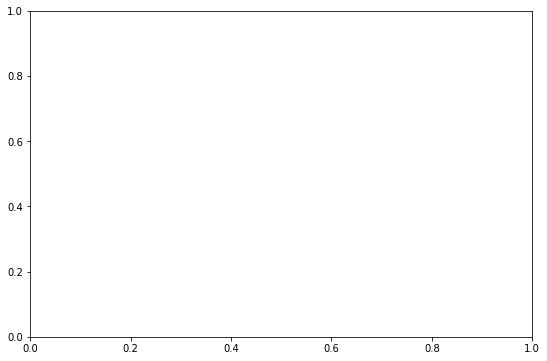

In [15]:
figure,(ax1) = plt.subplots(nrows=1,ncols=1)
figure.set_size_inches(9,6)
coef.plot(kind='barh',rot=0)

In [ ]:

def pred(x,coef,c): #coef에 
    a=x*coef
    added=0
    for j in a:
        added+=j
    added+=c
    return added
        


from flask import Flask, render_template, request

app = Flask(__name__)


@app.route('/')
def test():
    return render_template('post.html')

@app.route('/post', methods=['POST'])
def post():
    area = request.form['area']#목적지
    roomnum=request.form['roomnum']#방개수
    #people=request.form['people']#인원
    bednum=request.form['bednum']#침대개수
    room=request.form['room']#집형태
    bath=request.form['bath']#욕실개수
    
    #abc=[host,review,review_num,people,침실, 침대, 욕실, house,hotel, private, villa, dormitory]
    abc=[0,4.0,10,1,int(roomnum),int(bednum),int(bath),0,0,0,0,0]
    lenabc=len(abc)
    
    coe=0
    if area=="도봉구":
        coe=c1
    elif area=="동대문구":
        coe=c2
    elif area=="동작구":
        coe=c3
    elif area=="은평구":
        coe=c4
    elif area=="강북구":
        coe=c5
    elif area=="강동구":
        coe=c6
    elif area=="강남구":
        coe=c7
    elif area=="강서구":
        coe=c8
    elif area=="금천구":
        coe=c9
    elif area=="구로구":
        coe=c10
    elif area=="관악구":
        coe=c11
    elif area=="광진구":
        coe=c12
    elif area=="종로구":
        coe=c13
    else:
        coe=c14
    
    if room=="집 전체":
        abc[lenabc-5]=1
    elif room=="개인실":
        abc[lenabc-3]=1
    elif room=="호텔 객실":
        abc[lenabc-4]=1
    elif room=="다인실":
        abc[lenabc-1]=1
    else:
        abc[lenabc-2]=1 #만약을 위해서
        
    #abcd=pred(abc,c14[1:],c14[:1])
    abcd=pred(abc,coe[1:],coe[:1])
    abcde=float(abcd)
    abcdef=pow(10,abcd)
    abcdef=round(float(abcdef),1)
    
    return render_template('default.html',area=area, room=room, roomnum=roomnum, bednum=bednum, bath=bath, gs=str(abcdef)+"원")


if __name__ == '__main__':
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [09/Dec/2019 18:41:11] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [09/Dec/2019 18:41:34] "POST /post HTTP/1.1" 200 -
